In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mu = np.zeros((2, 1))
mu[0] = 1
mu[1] = 2
sigma = np.zeros((2, 2)) #variance covariance matrix
sigma[0][0] = 1 #variance of 1 for each
sigma[1][1] = 1
sigma[0][1] = 0.8 #covariance
sigma[1][0] = 0.8

In [4]:
#definte a grid and evaluate pdf over the grid
def gaussian2d(mu, sigma, xvals, yvals):
    const = (1.0 /(2.0*np.pi))*(1.0 / np.sqrt(np.linalg.det(sigma)))
    si = np.linalg.inv(sigma)
    xv = xvals - mu[0]
    yv = yvals - mu[1]
    return const * np.exp(-0.5*(xv*xv*si[0][0] + xv*yv*si[1][0] + yv*xv*si[0][1] + yv*yv*si[0][0]))

In [5]:
x = np.arange(-2, 4, 0.1)
y = np.arange(-2, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z = gaussian2d(mu, sigma, X, Y)

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


<matplotlib.contour.QuadContourSet instance at 0x0000000006888C88>

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


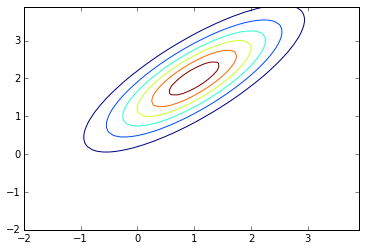

In [6]:
plt.contour(X, Y, Z)

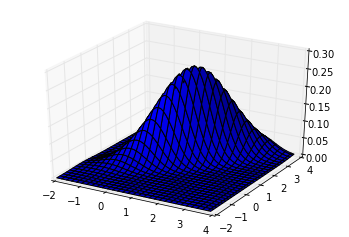

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z, rstride=2, cstride=2)

In [10]:
# maxN = 1000
u = np.random.rand(maxN, 1)**2
expvals = np.zeros((maxN - 1, 1))
for i in range(maxN - 1):
    expvals[i] = u[0:i + 1].mean()

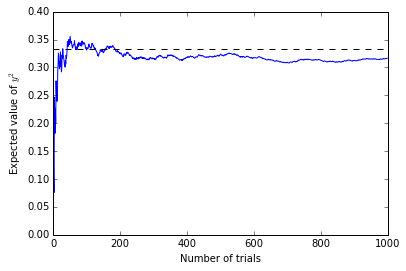

In [14]:
plt.plot(np.arange(maxN - 1), expvals)
plt.xlabel("Number of trials")
plt.plot([0, maxN - 1], [1.0/3.0, 1.0/3.0], "k--")
plt.ylabel("Expected value of $y^2$")

In [18]:
N = 100
x = np.sort((10 * np.random.rand(N, 1) - 5), axis=0)
t = 5*x**3 - x**2 + x
noise_var = 300
t = t + np.random.randn(N, 1)*np.sqrt(noise_var) #add normal noise
pos = ((x > 0)*(x < 2)).nonzero()[0]
x = np.delete(x, pos)[:, None] #remove where x is between 0 and 2
t = np.delete(t, pos)[:, None]
testx = np.linspace(-5, 5, 100)[:, None]

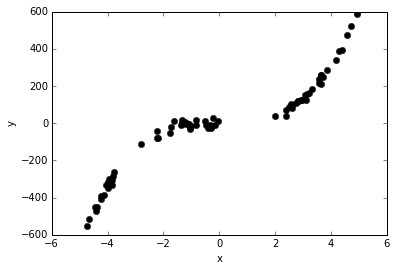

In [19]:
plt.plot(x, t, "ko")
plt.xlabel("x")
plt.ylabel("y")

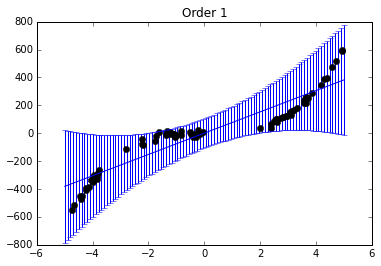

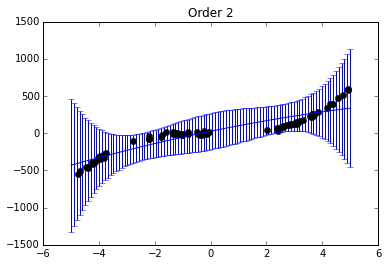

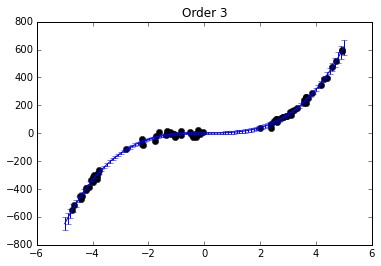

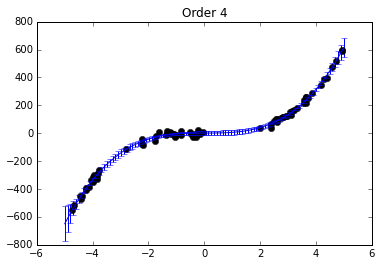

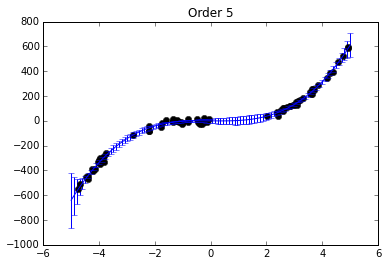

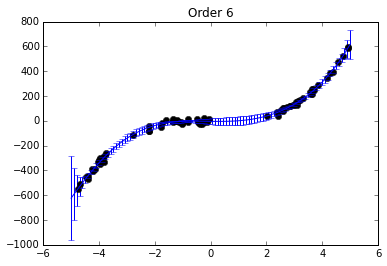

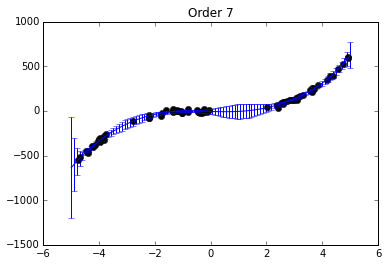

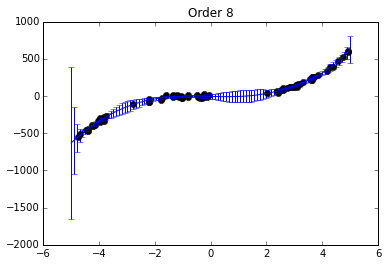

In [23]:
orders = np.arange(8) + 1
X = np.ones_like(x)
testX = np.ones_like(testx)
for i in orders:
    X = np.hstack((X, x**i)) #adds next power of x to data matrix
    testX = np.hstack((testX, testx**i))
    #weights of regression coefficients
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))
    sig_sq = ((t - np.dot(X, w))**2).mean() #mean squared error
    test_mean = np.dot(testX, w)
    test_var = np.diag(sig_sq * np.dot(np.dot(testX, np.linalg.inv(np.dot(X.T, X))), testX.T))[:, None]
    plt.figure()
    plt.plot(x, t, "ko")
    plt.errorbar(testx.flatten(), test_mean.flatten(), yerr=test_var.flatten())
    plt.title("Order " + str(i))

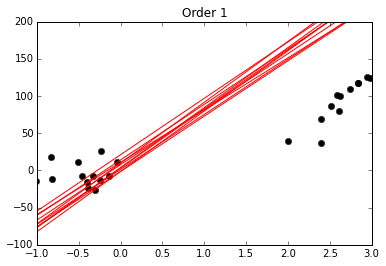

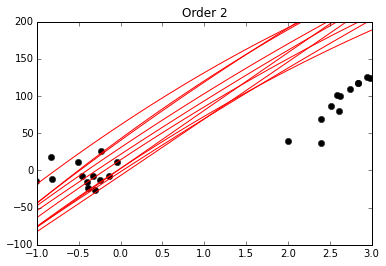

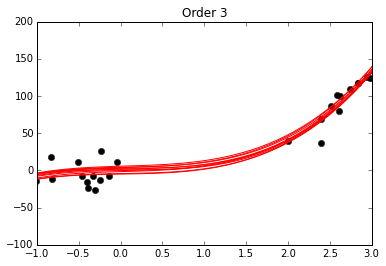

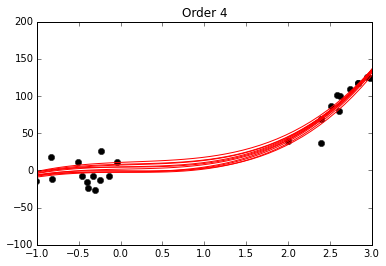

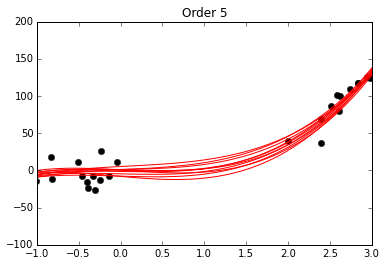

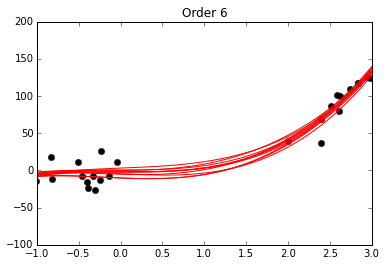

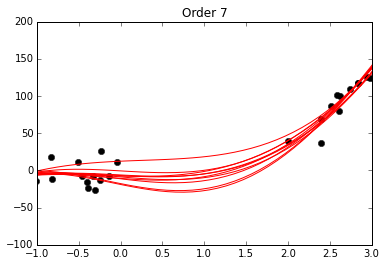

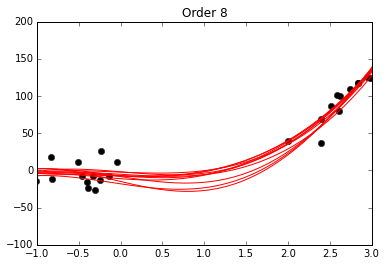

In [26]:
orders = np.arange(8) + 1
X = np.ones_like(x)
testX = np.ones_like(testx)
for i in orders:
    X = np.hstack((X, x**i))
    testX = np.hstack((testX, testx**i))
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))
    sig_sq = ((t - np.dot(X, w))**2).mean()
    testmean = np.dot(testX, w)
    covw = sig_sq * np.linalg.inv(np.dot(X.T, X))
    sampw = np.random.multivariate_normal(w.flatten(), covw, 10)
    plt.figure()
    plt.plot(x, t, "ko")
    plt.plot(testx, np.dot(testX, sampw.T), "r")
    plt.xlim([-1, 3])
    plt.ylim([-100, 200])
    plt.title("Order " + str(i))

In [8]:
data = np.loadtxt("olympic100m.txt", delimiter=",")
x = data[:, 0][:, None]
t = data[:, 1][:, None]

In [5]:
I = np.array([[50.0, 24.3311], [24.3311, 15.8953]])
print I
covw = np.linalg.inv(I)
print covw

[[ 50.      24.3311]
 [ 24.3311  15.8953]]
[[ 0.07839366 -0.11999798]
 [-0.11999798  0.24659383]]


In [6]:
I = np.array([[1250, 608.3], [608.3, 397.4]])
print I
covw = np.linalg.inv(I)
print covw

[[ 1250.    608.3]
 [  608.3   397.4]]
[[ 0.00313602 -0.00480031]
 [-0.00480031  0.00986418]]


In [10]:
X = np.hstack((np.ones_like(x), x))
XX = np.dot(X.T, X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T, t)
w = np.dot(invXX, Xt)
print w

[[  3.64164559e+01]
 [ -1.33308857e-02]]


In [13]:
N = len(t)
sigma2 = 1.0/N * (np.dot(t.T, t) - np.dot(t.T, np.dot(X, w)))[0][0]
sigma2 #maximum likelihood esitmator for sigma squared 

0.050307110527076773

In [15]:
covw = sigma2 * np.linalg.inv(np.dot(X.T, X))
covw #covariance matrix of the estimated coefficients

array([[  5.79720941e+00,  -2.96836413e-03],
       [ -2.96836413e-03,   1.52038987e-06]])

In [26]:
x = np.random.randn(10000)
np.var(x)

1.022072187645596

0.26126778176211474

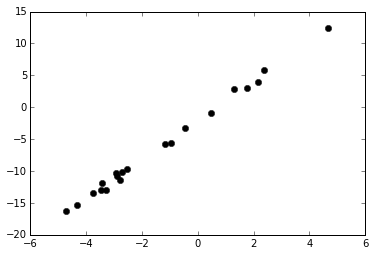

In [37]:
N = 20
x = np.sort((10 * np.random.rand(N, 1) - 5), axis = 0)
t = -2 + 3*x
noise_var = 0.25
t = t + np.random.randn(N, 1)*np.sqrt(noise_var)
plt.plot(x, t, "ko")
X = np.hstack((np.ones_like(x), x))
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))
w
sigma2 = 1.0/N*(np.dot(t.T, t) - np.dot(t.T, np.dot(X, w)))[0][0]
sigma2

In [50]:
Ns = [10, 25, 100, 250, 500, 1000, 10000]
expsig2 = []
noise_var = 0.25
numtrials = 1000
for N in Ns:
    sigsum = 0.0
    for i in range(numtrials):
        x = np.sort((10 * np.random.rand(N, 1) - 5), axis = 0)
        t = -2 + 3*x
        t = t + np.random.randn(N, 1)*np.sqrt(noise_var)
        X = np.hstack((np.ones_like(x), x))
        w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, t))
        sigma2 = 1.0/N*(np.dot(t.T, t) - np.dot(t.T, np.dot(X, w)))[0][0]
        sigsum += sigma2
    expsig2.append(sigsum/numtrials)
print expsig2        

[0.20304380911020312, 0.23179903366721502, 0.24357751041678524, 0.24830555286326914, 0.24967796775006365, 0.24900307172973637, 0.25006019883419833]


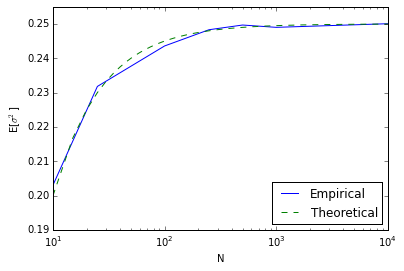

In [63]:
Nspace = np.linspace(10, 10000, 2000)
sig2theo = noise_var*(1.0 - 2/Nspace)
plt.plot(Ns, expsig2, label = "Empirical")
plt.plot(Nspace, sig2theo, linestyle = "--", label = "Theoretical")
plt.xlabel("N")
plt.semilogx()
plt.ylabel("E[$\sigma^2$]")
plt.ylim([0.19, 0.255])
plt.legend(loc = "lower right")